<a href="https://colab.research.google.com/github/Barbarelaa/projeto-olist-forecast/blob/main/notebooks/01_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib seaborn kaggle prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
from google.colab import files
import pandas as pd

files.upload()

orders = pd.read_csv(
    'olist_orders_dataset.csv',
    parse_dates=['order_purchase_timestamp']
)

orders.head()

Saving olist_orders_dataset.csv to olist_orders_dataset.csv


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


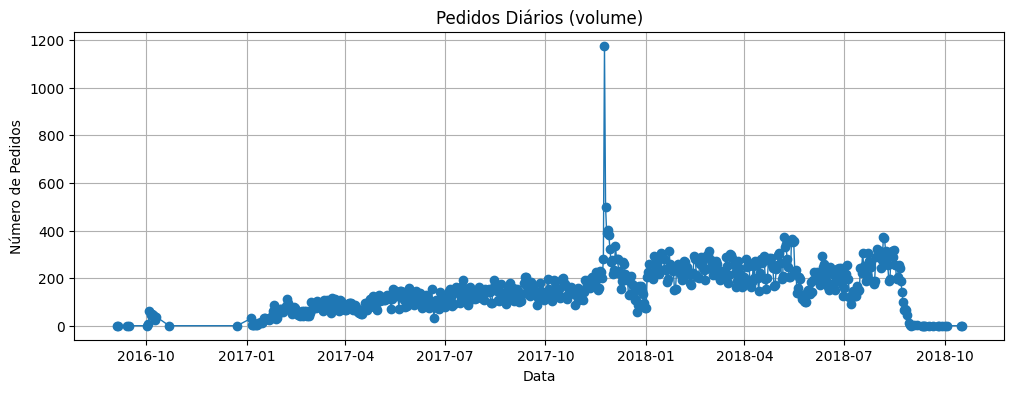

In [4]:
orders['ds'] = orders['order_purchase_timestamp'].dt.date

daily = (
    orders
    .groupby('ds')
    .order_id.count()
    .reset_index()
)

daily.columns = ['ds', 'y']
daily['ds'] = pd.to_datetime(daily['ds'])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(daily['ds'], daily['y'], marker='o', linewidth=1)
plt.title('Pedidos Diários (volume)')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

Tendência clara de alta no começo, depois plateau( padrão de crescimento e estabilização)

Pico(s) sazonais e outliers: remover ou transformar outlier de nov/2017 e incluir variáveis dummies de feriado/Black Friday.

Sazonalidade semanal/mensal: incluir dia da semana e mês como features

Corte de dados: definir um período de treino que exclua os últimos pontos incompletos para não enviesar o forecast.